In [2]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings("ignore")
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] =12
matplotlib.rcParams['text.color'] = 'k'

# Load specific forecasting tools
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

In [3]:
path_to_data = 'https://raw.githubusercontent.com/bashirmohd/DataSceince/master/Time-series-prediction_production/all_links.csv'

In [4]:
df = pd.read_csv(path_to_data)

In [5]:
df.head()

,Days,aofa_lon_In_speed,aofa_lon_out_speed,cern_wash_in_speed,cern_wash_out_speed,lond_newy_in_speed,lond_newy_out_speed,amst_bost_in_speed,amst_bost_out_speed
0,16/10/2018 00:00,408.349690,690.415634,971.155230,585.652850,441.026750,241.125777,543.544807,347.829680
1,16/10/2018 01:00,457.998735,762.059386,918.014878,719.141197,460.608150,244.870237,660.252326,275.334507
2,16/10/2018 02:00,424.732987,675.971718,713.724641,903.577400,406.037214,287.920252,760.556908,168.474651
3,16/10/2018 03:00,354.733448,620.564280,765.424668,901.849704,445.741674,184.174207,889.167762,143.830323
4,16/10/2018 04:00,362.946799,667.688283,938.107670,764.589890,357.538164,204.020466,1177.313635,271.596804


In [6]:
df.tail()

,Days,aofa_lon_In_speed,aofa_lon_out_speed,cern_wash_in_speed,cern_wash_out_speed,lond_newy_in_speed,lond_newy_out_speed,amst_bost_in_speed,amst_bost_out_speed
2155,13/01/2019 19:00,119.590209,218.709408,948.282200,1107.255585,97.151573,91.131893,475.274037,143.211147
2156,13/01/2019 20:00,97.765101,208.164222,877.484034,1072.885087,81.116056,115.617786,458.203075,149.098428
2157,13/01/2019 21:00,81.826164,215.351361,1593.645507,869.034227,89.724965,160.531366,485.701395,143.253542
2158,13/01/2019 22:00,187.980324,323.162112,1248.875094,1260.192950,90.066610,122.153071,735.878701,145.124550
2159,13/01/2019 23:00,203.064999,305.765805,1133.892601,948.649530,92.342601,143.393375,482.422127,135.015699


In [7]:
df = df.dropna()

In [8]:
df.shape

(2160, 9)

In [9]:
df.isnull().sum()

Days                   0
aofa_lon_In_speed      0
aofa_lon_out_speed     0
cern_wash_in_speed     0
cern_wash_out_speed    0
lond_newy_in_speed     0
lond_newy_out_speed    0
amst_bost_in_speed     0
amst_bost_out_speed    0
dtype: int64

In [10]:
df.dtypes

Days                    object
aofa_lon_In_speed      float64
aofa_lon_out_speed     float64
cern_wash_in_speed     float64
cern_wash_out_speed    float64
lond_newy_in_speed     float64
lond_newy_out_speed    float64
amst_bost_in_speed     float64
amst_bost_out_speed    float64
dtype: object

Text(0.5,1,'Bandwidth Utitilization Over Time (3-Months)')

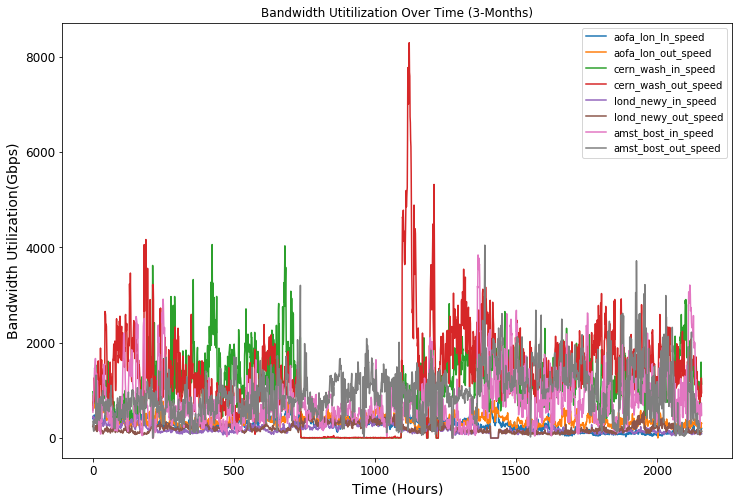

In [11]:
df.plot(figsize=(12,8))
plt.xlabel('Time (Hours)')
plt.ylabel('Bandwidth Utilization(Gbps)')
plt.title('Bandwidth Utitilization Over Time (3-Months)')

In [12]:
df['Days'] = pd.to_datetime(df['Days'],infer_datetime_format=True)

In [13]:
df = df.set_index('Days')

In [14]:
df.head()

,aofa_lon_In_speed,aofa_lon_out_speed,cern_wash_in_speed,cern_wash_out_speed,lond_newy_in_speed,lond_newy_out_speed,amst_bost_in_speed,amst_bost_out_speed
Days,,,,,,,,
2018-10-16 00:00:00,408.349690,690.415634,971.155230,585.652850,441.026750,241.125777,543.544807,347.829680
2018-10-16 01:00:00,457.998735,762.059386,918.014878,719.141197,460.608150,244.870237,660.252326,275.334507
2018-10-16 02:00:00,424.732987,675.971718,713.724641,903.577400,406.037214,287.920252,760.556908,168.474651
2018-10-16 03:00:00,354.733448,620.564280,765.424668,901.849704,445.741674,184.174207,889.167762,143.830323
2018-10-16 04:00:00,362.946799,667.688283,938.107670,764.589890,357.538164,204.020466,1177.313635,271.596804


In [15]:
df.columns

Index(['aofa_lon_In_speed', 'aofa_lon_out_speed', 'cern_wash_in_speed',
       'cern_wash_out_speed', 'lond_newy_in_speed', 'lond_newy_out_speed',
       'amst_bost_in_speed', 'amst_bost_out_speed'],
      dtype='object')

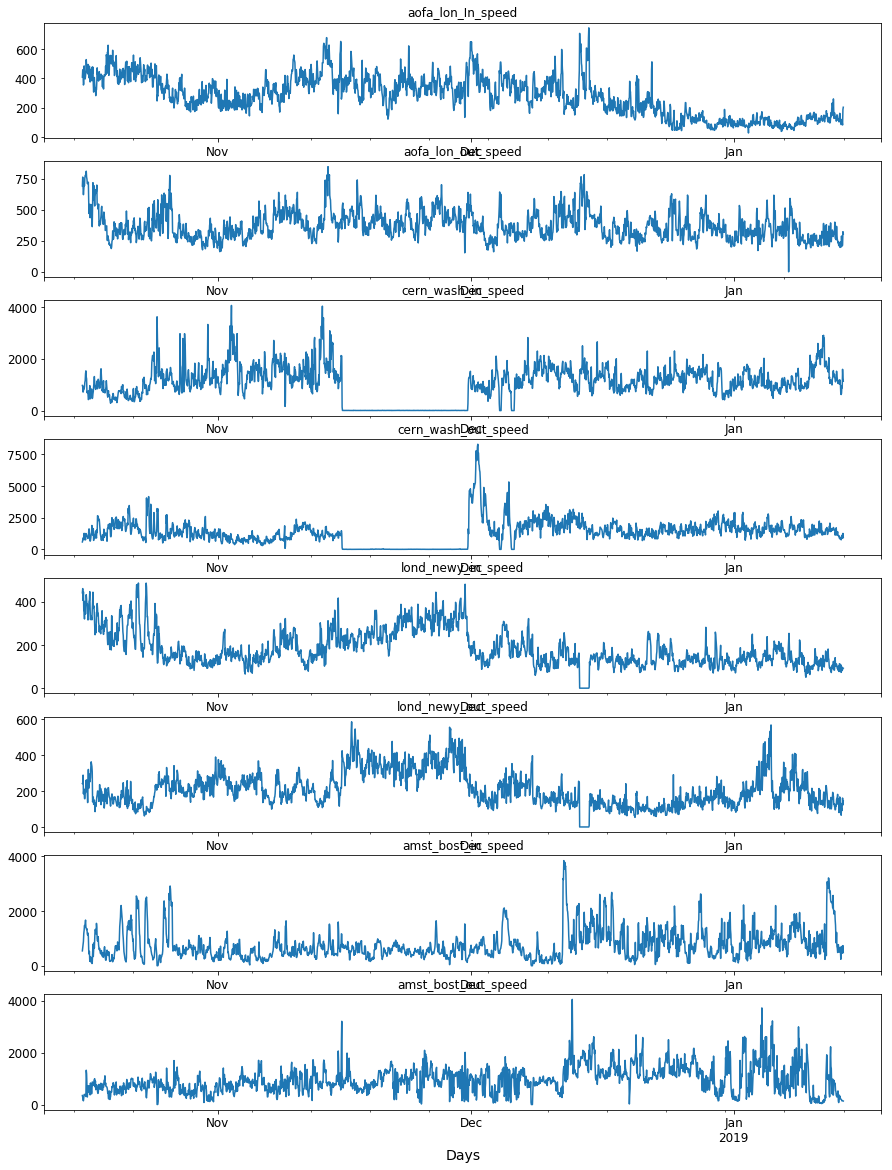

In [16]:
fig,ax = plt.subplots(8,1,figsize=(15,20))
for i,column in enumerate([col for col in df.columns]):
    df[column].plot(ax=ax[i])
    ax[i].set_title(column)

In [17]:
#Test for Stationarity
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [18]:

#define function for kpss test
#from statsmodels.tsa.stattools import kpss
#define KPSS
#def kpss_test(timeseries):
#    print ('Results of KPSS Test:')
#    kpsstest = kpss(timeseries, regression='c')
#    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
#    for key,value in kpsstest[3].items():
#    kpss_output ['Critical Value (%s)'%key] = value
#print(kpss_output)

In [19]:
df.columns

Index(['aofa_lon_In_speed', 'aofa_lon_out_speed', 'cern_wash_in_speed',
       'cern_wash_out_speed', 'lond_newy_in_speed', 'lond_newy_out_speed',
       'amst_bost_in_speed', 'amst_bost_out_speed'],
      dtype='object')

In [20]:
adf_test(df['aofa_lon_In_speed'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -2.922002
p-value                    0.042849
# lags used               25.000000
# observations          2134.000000
critical value (1%)       -3.433418
critical value (5%)       -2.862895
critical value (10%)      -2.567492
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [21]:
adf_test(df['aofa_lon_out_speed'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -8.288254e+00
p-value                 4.331419e-13
# lags used             5.000000e+00
# observations          2.154000e+03
critical value (1%)    -3.433390e+00
critical value (5%)    -2.862883e+00
critical value (10%)   -2.567485e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [22]:
adf_test(df['cern_wash_in_speed'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -4.566038
p-value                    0.000149
# lags used               11.000000
# observations          2148.000000
critical value (1%)       -3.433398
critical value (5%)       -2.862886
critical value (10%)      -2.567487
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [23]:
adf_test(df['cern_wash_out_speed'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -4.575110
p-value                    0.000144
# lags used               20.000000
# observations          2139.000000
critical value (1%)       -3.433411
critical value (5%)       -2.862892
critical value (10%)      -2.567490
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [24]:
adf_test(df['lond_newy_in_speed']) 

Augmented Dickey-Fuller Test: 
ADF test statistic        -3.463463
p-value                    0.008977
# lags used               21.000000
# observations          2138.000000
critical value (1%)       -3.433412
critical value (5%)       -2.862893
critical value (10%)      -2.567490
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [25]:
adf_test(df['lond_newy_out_speed']) 

Augmented Dickey-Fuller Test: 
ADF test statistic        -3.436511
p-value                    0.009775
# lags used               19.000000
# observations          2140.000000
critical value (1%)       -3.433409
critical value (5%)       -2.862892
critical value (10%)      -2.567489
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [26]:
adf_test(df['amst_bost_in_speed']) 

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.152567e+01
p-value                 3.941843e-21
# lags used             0.000000e+00
# observations          2.159000e+03
critical value (1%)    -3.433382e+00
critical value (5%)    -2.862880e+00
critical value (10%)   -2.567483e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [27]:
adf_test(df['amst_bost_out_speed']) 

Augmented Dickey-Fuller Test: 
ADF test statistic        -5.513179
p-value                    0.000002
# lags used               25.000000
# observations          2134.000000
critical value (1%)       -3.433418
critical value (5%)       -2.862895
critical value (10%)      -2.567492
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


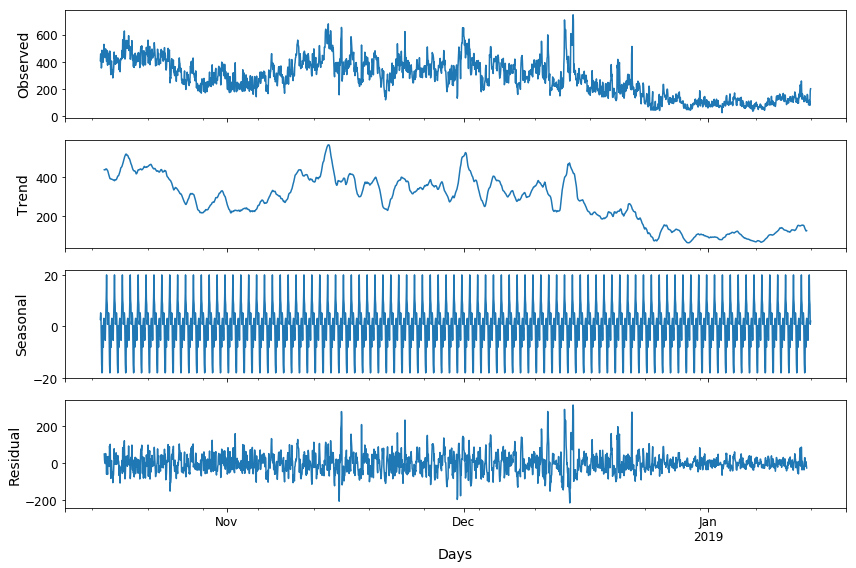

In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df['aofa_lon_In_speed'], model='additive')
fig = decomposition.plot()
plt.show()

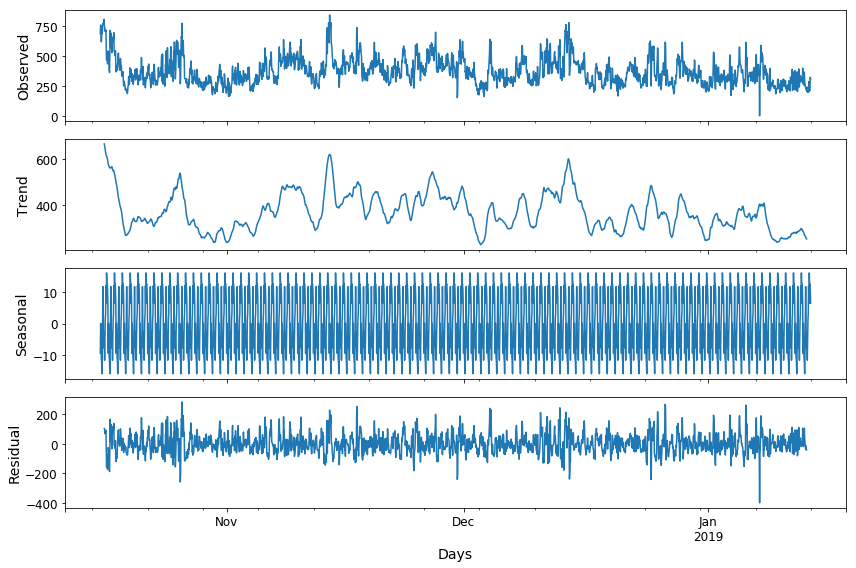

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df['aofa_lon_out_speed'], model='additive')
fig = decomposition.plot()
plt.show()

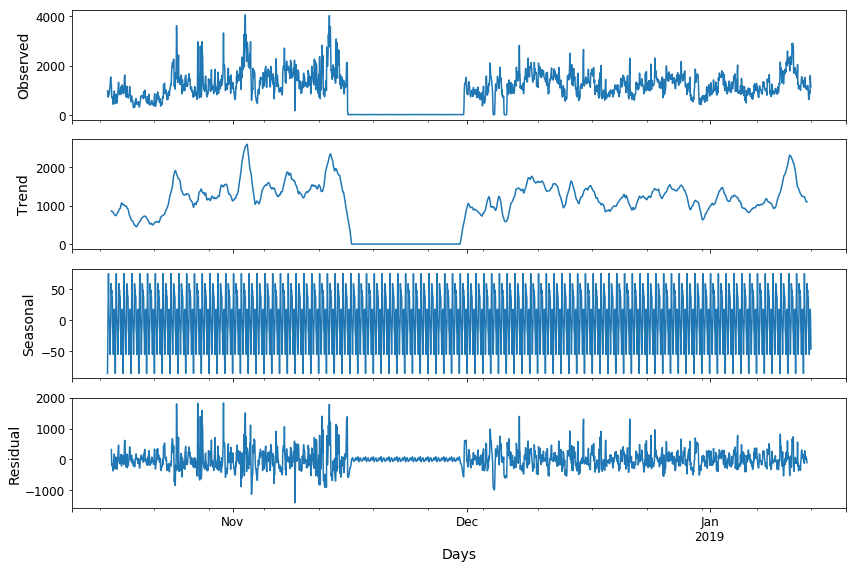

In [30]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df['cern_wash_in_speed'], model='additive')
fig = decomposition.plot()
plt.show()

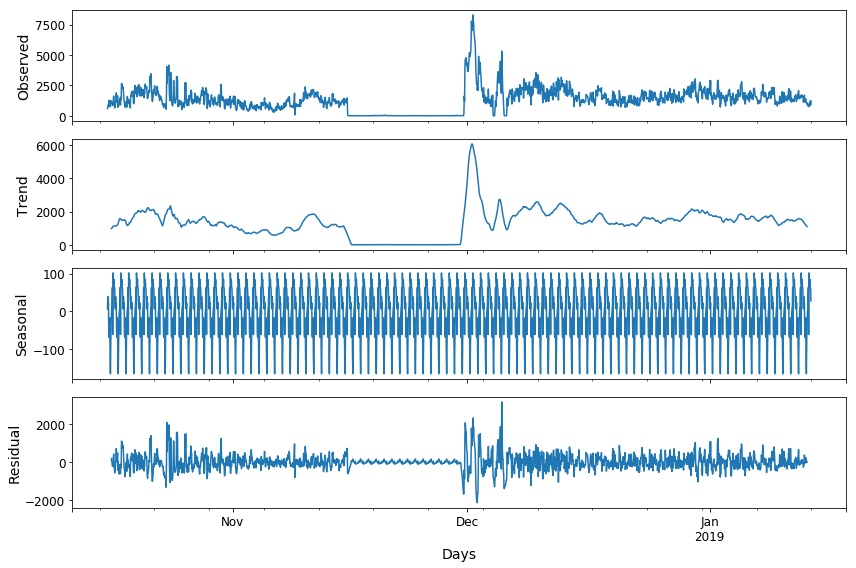

In [31]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df['cern_wash_out_speed'], model='additive')
fig = decomposition.plot()
plt.show()

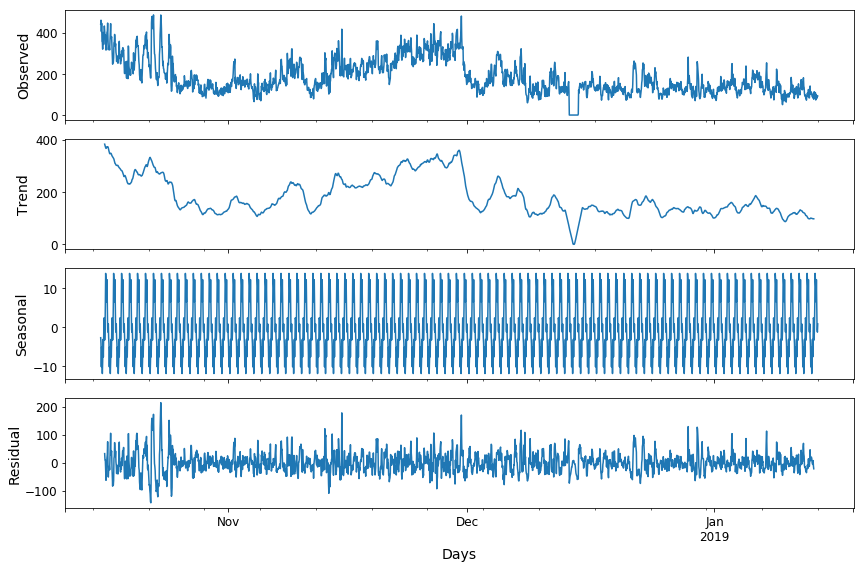

In [32]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df['lond_newy_in_speed'], model='additive')
fig = decomposition.plot()
plt.show()

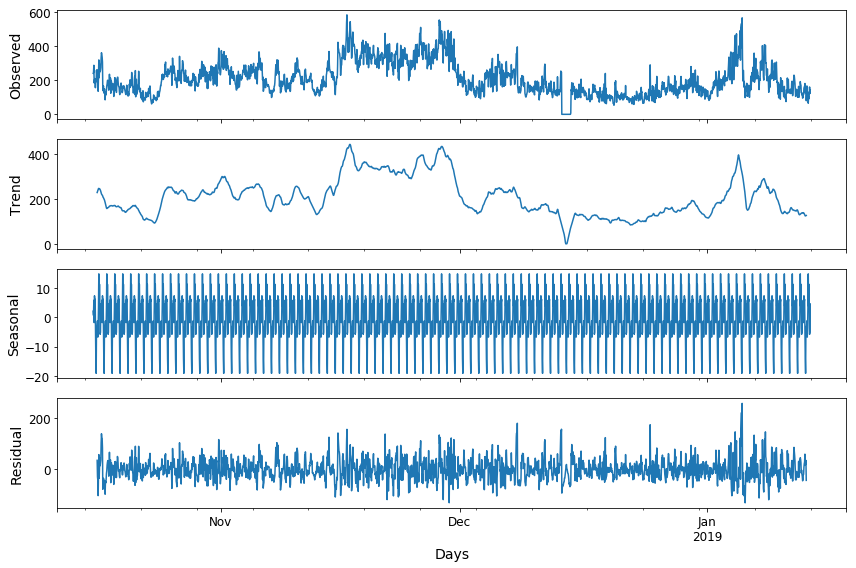

In [33]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df['lond_newy_out_speed'], model='additive')
fig = decomposition.plot()
plt.show()

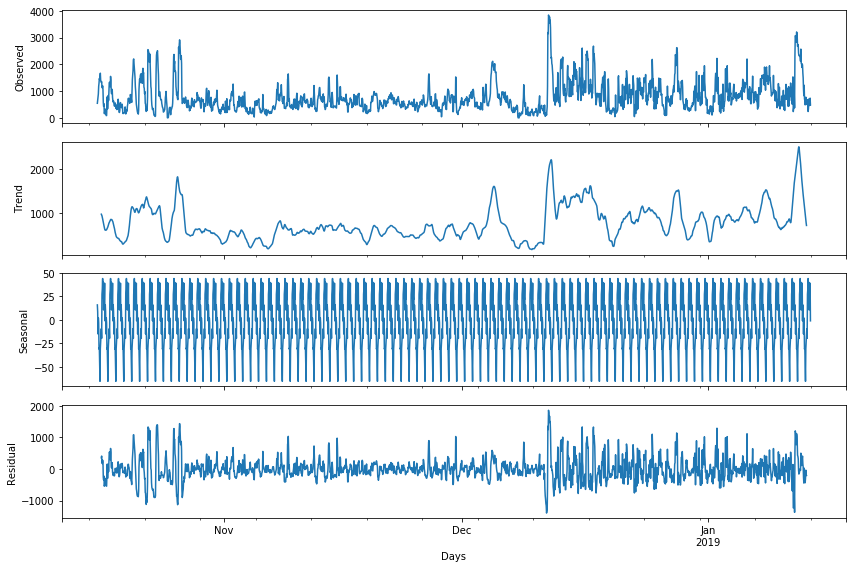

In [99]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df['amst_bost_in_speed'], model='additive')
fig = decomposition.plot()
plt.show()

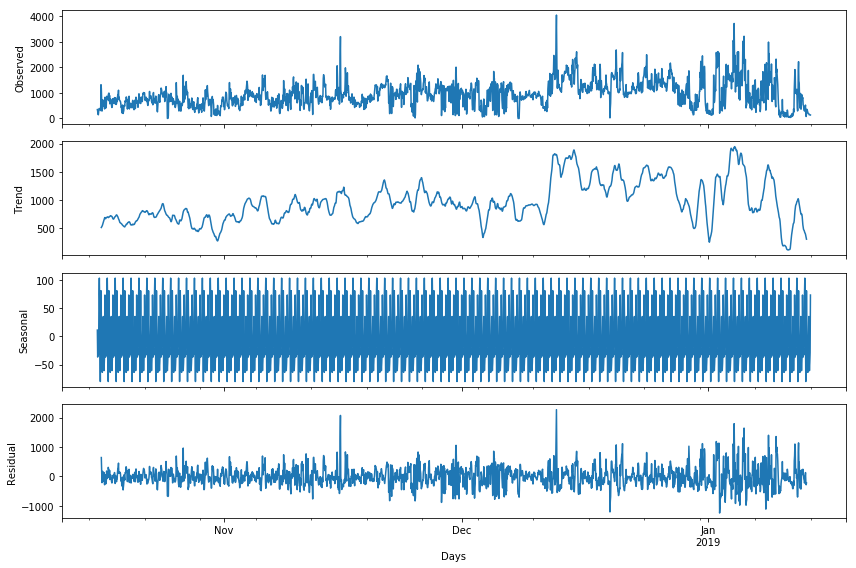

In [100]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df['amst_bost_out_speed'], model='additive')
fig = decomposition.plot()
plt.show()

In [37]:
df.shape

(2160, 8)

In [38]:
average_daily_speed = df.resample('D').mean()
average_daily_speed.dtypes

aofa_lon_In_speed      float64
aofa_lon_out_speed     float64
cern_wash_in_speed     float64
cern_wash_out_speed    float64
lond_newy_in_speed     float64
lond_newy_out_speed    float64
amst_bost_in_speed     float64
amst_bost_out_speed    float64
dtype: object

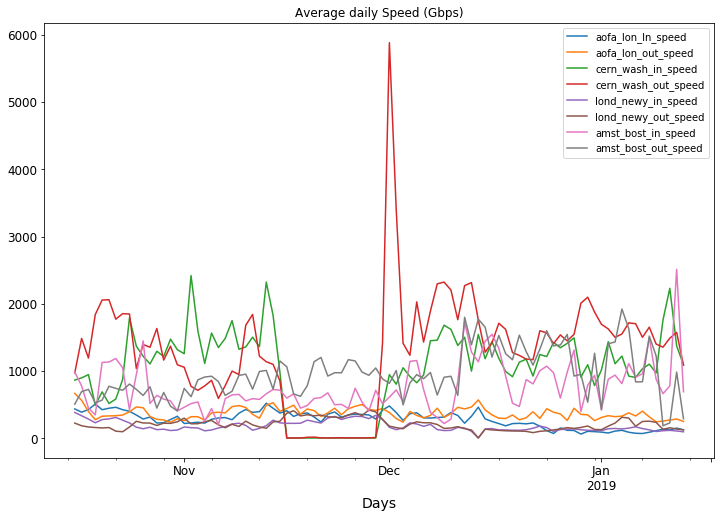

In [39]:
average_daily_speed.plot()
plt.title('Average daily Speed (Gbps)')
plt.show()

In [40]:
average_daily_speed.head()

,aofa_lon_In_speed,aofa_lon_out_speed,cern_wash_in_speed,cern_wash_out_speed,lond_newy_in_speed,lond_newy_out_speed,amst_bost_in_speed,amst_bost_out_speed
Days,,,,,,,,
2018-10-16,437.322709,668.236505,866.801325,973.441122,384.984598,226.612566,986.349372,508.411237
2018-10-17,389.297759,565.362320,898.892946,1485.657352,335.996721,187.641628,780.462056,694.627261
2018-10-18,428.162168,398.529560,947.584893,1193.884390,286.835065,169.041298,450.024672,728.478939
2018-10-19,509.773571,276.883716,493.055479,1840.617383,231.134400,161.296751,349.142117,527.309612
2018-10-20,425.864657,329.079479,691.429688,2056.658225,278.799694,154.665703,1129.103535,568.583561


In [41]:
df_av = average_daily_speed

In [42]:
df_av.head()

,aofa_lon_In_speed,aofa_lon_out_speed,cern_wash_in_speed,cern_wash_out_speed,lond_newy_in_speed,lond_newy_out_speed,amst_bost_in_speed,amst_bost_out_speed
Days,,,,,,,,
2018-10-16,437.322709,668.236505,866.801325,973.441122,384.984598,226.612566,986.349372,508.411237
2018-10-17,389.297759,565.362320,898.892946,1485.657352,335.996721,187.641628,780.462056,694.627261
2018-10-18,428.162168,398.529560,947.584893,1193.884390,286.835065,169.041298,450.024672,728.478939
2018-10-19,509.773571,276.883716,493.055479,1840.617383,231.134400,161.296751,349.142117,527.309612
2018-10-20,425.864657,329.079479,691.429688,2056.658225,278.799694,154.665703,1129.103535,568.583561


In [43]:
df_av.shape

(90, 8)

In [44]:
# NUm of Observations
nobs = 24

In [45]:
train = df_av[:-nobs] #Start=  begining of df--> -24 from the end

In [46]:
test = df_av[-nobs:]# start -24 from the end of the DF ---> go to the end of DF

In [47]:
print(train.shape)
print(test.shape)

(66, 8)
(24, 8)


In [48]:
for i in [1,2,3,4,5,6,7]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  77.97012372267646
BIC:  80.37867577548393

Order = 2
AIC:  78.51593334552769
BIC:  83.10355989766698

Order = 3
AIC:  78.89606823555488
BIC:  85.69967054155974

Order = 4
AIC:  78.37298424032393
BIC:  87.43045968632238

Order = 5
AIC:  76.10180321372988
BIC:  87.4520757948585

Order = 6
AIC:  69.95038440139673
BIC:  83.63343554124779

Order = 7


LinAlgError: 3-th leading minor of the array is not positive definite

In [49]:
results = model.fit(6)  #p=6

In [50]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 08, Jun, 2019
Time:                     08:58:47
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    83.6334
Nobs:                     60.0000    HQIC:                   75.3026
Log likelihood:          -2387.60    FPE:                4.70495e+32
AIC:                      69.9504    Det(Omega_mle):     3.96600e+30
--------------------------------------------------------------------
Results for equation aofa_lon_In_speed
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                        389.960153       480.610015            0.811           0.417
L1.aofa_lon_In_speed          -0.356307         0.489124           -0.728           0.466
L1.aofa_lon_

In [51]:
train.values[-6:].shape  #Lag order = 6, k = 8.

(6, 8)

In [52]:
lagged_values = train.values[-6:]

In [53]:
z = results.forecast(y=lagged_values,steps=24)

In [54]:
z

array([[ 1.96072144e+02,  3.14030258e+02,  1.21164049e+03,
         2.01390759e+01,  1.80214609e+02,  1.86234180e+02,
         5.16293439e+02,  9.16005426e+02],
       [ 1.00951047e+02,  4.58406792e+02,  1.79677269e+03,
        -3.68435516e+02,  2.06872818e+02,  1.84976343e+02,
         1.08517508e+03,  1.01505593e+03],
       [ 1.94597165e+02,  5.39461096e+02,  1.40465113e+03,
         8.10833384e+02,  2.47956396e+02,  1.52227557e+02,
         1.20596185e+03,  1.71276362e+03],
       [ 3.76605051e+02,  6.13441890e+02,  1.67973899e+03,
         2.42162939e+03,  1.25161750e+02,  7.68295346e+01,
         8.61039317e+02,  1.74863134e+03],
       [ 3.27261249e+02,  4.33375820e+02,  1.93030748e+03,
         3.46830330e+03,  3.16607638e+01, -6.50116203e-01,
         7.97564365e+02,  1.71758873e+03],
       [ 2.87635807e+02,  3.13972422e+02,  2.24533421e+03,
         2.68541927e+03,  7.34750518e+01,  1.09436303e+01,
         9.00881980e+02,  1.32406590e+03],
       [ 3.56838488e+02,  4.532465

In [55]:
test

,aofa_lon_In_speed,aofa_lon_out_speed,cern_wash_in_speed,cern_wash_out_speed,lond_newy_in_speed,lond_newy_out_speed,amst_bost_in_speed,amst_bost_out_speed
Days,,,,,,,,
2018-12-21,215.879720,306.440569,1177.075643,1178.959162,128.927345,103.827114,874.214005,1289.868606
2018-12-22,228.973823,395.635975,926.019419,1169.549364,150.747507,85.172428,809.270164,1089.055965
2018-12-23,181.240180,296.084513,1245.846542,1599.777599,181.744727,104.379450,1004.882837,1325.545218
2018-12-24,114.956234,440.358917,1216.801733,1568.060604,160.196951,112.739425,1073.264269,1600.891117
2018-12-25,72.512225,388.518913,1426.209589,1408.670780,102.085756,125.657343,976.600899,1375.496463
2018-12-26,154.237042,363.306233,1347.373837,1537.753483,131.373812,140.379850,599.012434,1387.883937
2018-12-27,119.583671,266.616529,1412.008585,1449.005356,136.420522,158.938037,984.131315,1544.332966
2018-12-28,117.028806,447.063789,1494.097807,1546.972306,139.968154,148.233716,1312.234901,925.751925
2018-12-29,63.865425,356.737656,910.497044,2009.528309,128.224294,161.785007,398.320084,952.344570


In [56]:
df_av.columns

Index(['aofa_lon_In_speed', 'aofa_lon_out_speed', 'cern_wash_in_speed',
       'cern_wash_out_speed', 'lond_newy_in_speed', 'lond_newy_out_speed',
       'amst_bost_in_speed', 'amst_bost_out_speed'],
      dtype='object')

In [57]:
idx = pd.date_range('2018-12-21', periods =24, freq='D')

In [58]:
idx

DatetimeIndex(['2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01',
               '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
               '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09',
               '2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13'],
              dtype='datetime64[ns]', freq='D')

In [59]:
df_av_forecast = pd.DataFrame(data=z,index=idx,columns=['aofa_lon_In_speed_f','aofa_lon_out_speed_f','cern_wash_in_speed_f','cern_wash_out_speed_f','lond_newy_in_speed_f','lond_newy_out_speed_f','amst_bost_in_speed_f','amst_bost_out_speed_f'])

In [60]:
df_av_forecast.head()

,aofa_lon_In_speed_f,aofa_lon_out_speed_f,cern_wash_in_speed_f,cern_wash_out_speed_f,lond_newy_in_speed_f,lond_newy_out_speed_f,amst_bost_in_speed_f,amst_bost_out_speed_f
2018-12-21,196.072144,314.030258,1211.640492,20.139076,180.214609,186.234180,516.293439,916.005426
2018-12-22,100.951047,458.406792,1796.772689,-368.435516,206.872818,184.976343,1085.175079,1015.055930
2018-12-23,194.597165,539.461096,1404.651134,810.833384,247.956396,152.227557,1205.961852,1712.763616
2018-12-24,376.605051,613.441890,1679.738987,2421.629388,125.161750,76.829535,861.039317,1748.631338
2018-12-25,327.261249,433.375820,1930.307480,3468.303302,31.660764,-0.650116,797.564365,1717.588725


In [61]:
df_av.head()

,aofa_lon_In_speed,aofa_lon_out_speed,cern_wash_in_speed,cern_wash_out_speed,lond_newy_in_speed,lond_newy_out_speed,amst_bost_in_speed,amst_bost_out_speed
Days,,,,,,,,
2018-10-16,437.322709,668.236505,866.801325,973.441122,384.984598,226.612566,986.349372,508.411237
2018-10-17,389.297759,565.362320,898.892946,1485.657352,335.996721,187.641628,780.462056,694.627261
2018-10-18,428.162168,398.529560,947.584893,1193.884390,286.835065,169.041298,450.024672,728.478939
2018-10-19,509.773571,276.883716,493.055479,1840.617383,231.134400,161.296751,349.142117,527.309612
2018-10-20,425.864657,329.079479,691.429688,2056.658225,278.799694,154.665703,1129.103535,568.583561


In [62]:
test_range = df_av[-nobs:]

In [63]:
test_range

,aofa_lon_In_speed,aofa_lon_out_speed,cern_wash_in_speed,cern_wash_out_speed,lond_newy_in_speed,lond_newy_out_speed,amst_bost_in_speed,amst_bost_out_speed
Days,,,,,,,,
2018-12-21,215.879720,306.440569,1177.075643,1178.959162,128.927345,103.827114,874.214005,1289.868606
2018-12-22,228.973823,395.635975,926.019419,1169.549364,150.747507,85.172428,809.270164,1089.055965
2018-12-23,181.240180,296.084513,1245.846542,1599.777599,181.744727,104.379450,1004.882837,1325.545218
2018-12-24,114.956234,440.358917,1216.801733,1568.060604,160.196951,112.739425,1073.264269,1600.891117
2018-12-25,72.512225,388.518913,1426.209589,1408.670780,102.085756,125.657343,976.600899,1375.496463
2018-12-26,154.237042,363.306233,1347.373837,1537.753483,131.373812,140.379850,599.012434,1387.883937
2018-12-27,119.583671,266.616529,1412.008585,1449.005356,136.420522,158.938037,984.131315,1544.332966
2018-12-28,117.028806,447.063789,1494.097807,1546.972306,139.968154,148.233716,1312.234901,925.751925
2018-12-29,63.865425,356.737656,910.497044,2009.528309,128.224294,161.785007,398.320084,952.344570


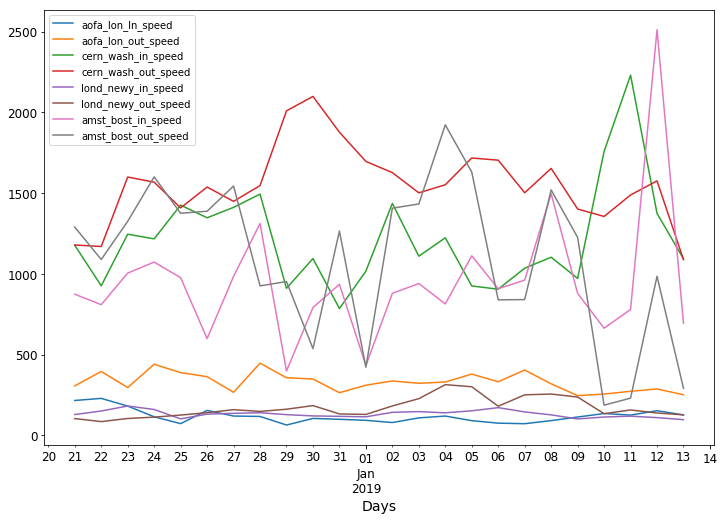

In [64]:
test_range.plot(figsize=(12,8))

In [65]:
df_av_forecast.columns

Index(['aofa_lon_In_speed_f', 'aofa_lon_out_speed_f', 'cern_wash_in_speed_f',
       'cern_wash_out_speed_f', 'lond_newy_in_speed_f',
       'lond_newy_out_speed_f', 'amst_bost_in_speed_f',
       'amst_bost_out_speed_f'],
      dtype='object')

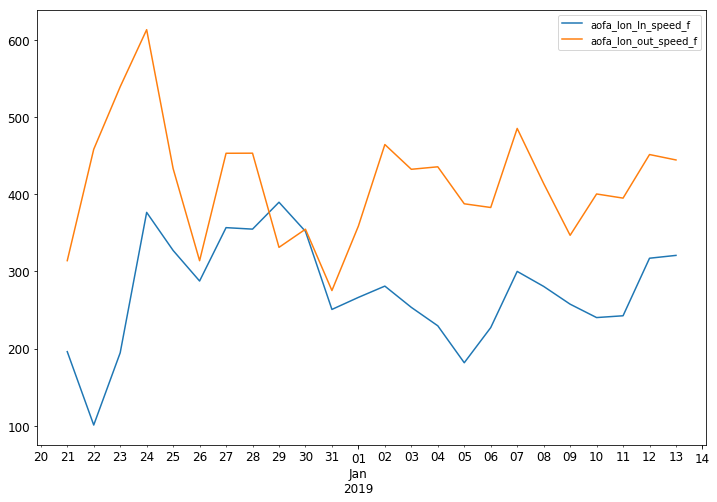

In [66]:
df_av_forecast[['aofa_lon_In_speed_f','aofa_lon_out_speed_f']].plot(figsize=(12,8))

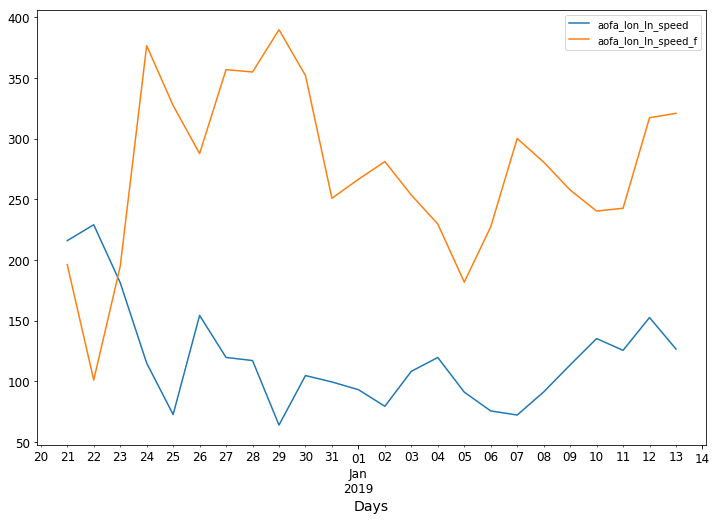

In [67]:
test_range['aofa_lon_In_speed'].plot(legend=True,figsize=(12,8))
df_av_forecast['aofa_lon_In_speed_f'].plot(legend=True)

In [68]:
rmse(test_range['aofa_lon_In_speed'],df_av_forecast['aofa_lon_In_speed_f'])

183.13352505314236

In [69]:
test_range['aofa_lon_In_speed'].mean()

118.9610396522222

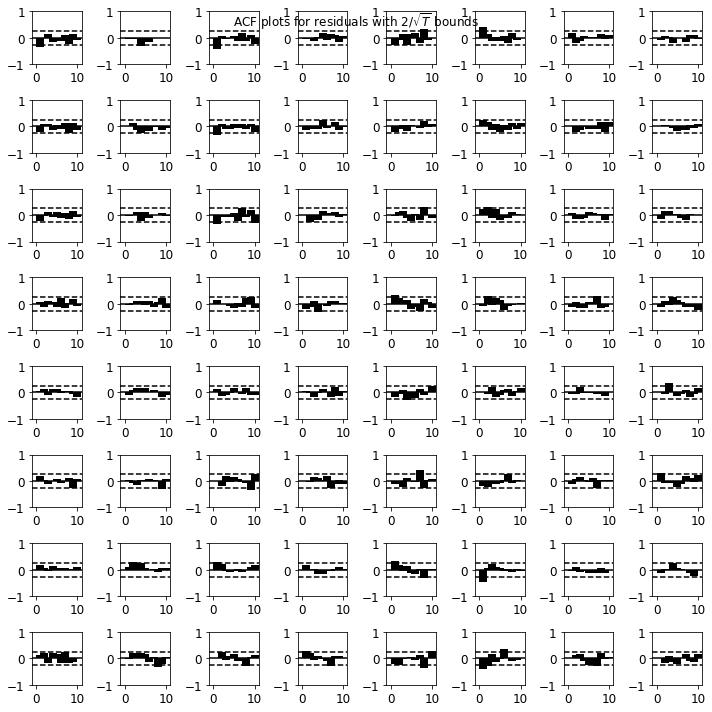

In [79]:
results.plot_acorr()
plt.tight_layout()

In [71]:
model.select_order(6)

In [74]:
results = model.fit(maxlags=6, ic='aic')

In [75]:
lag_order = results.k_ar

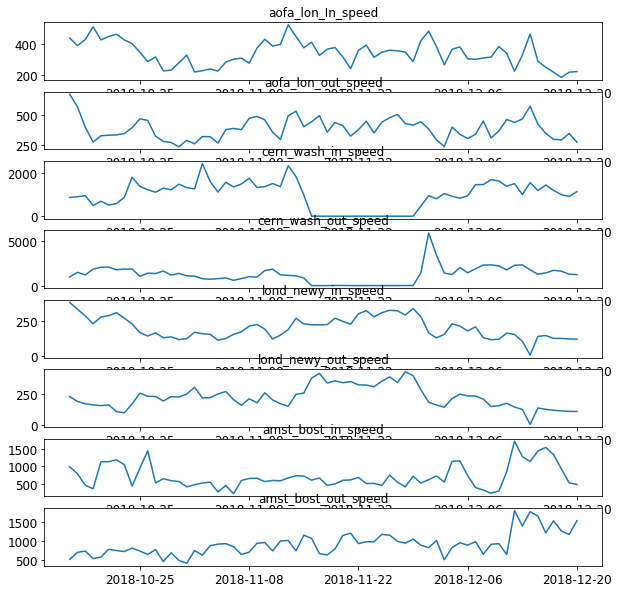

In [76]:
#final = results1.plot_forecast(10)
fig =results.plot()


Text(0.5,0,'Days')

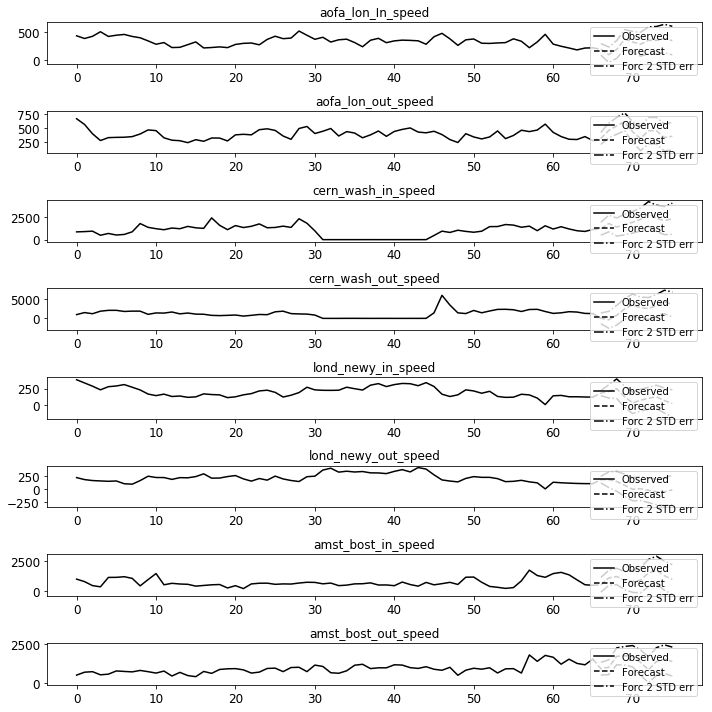

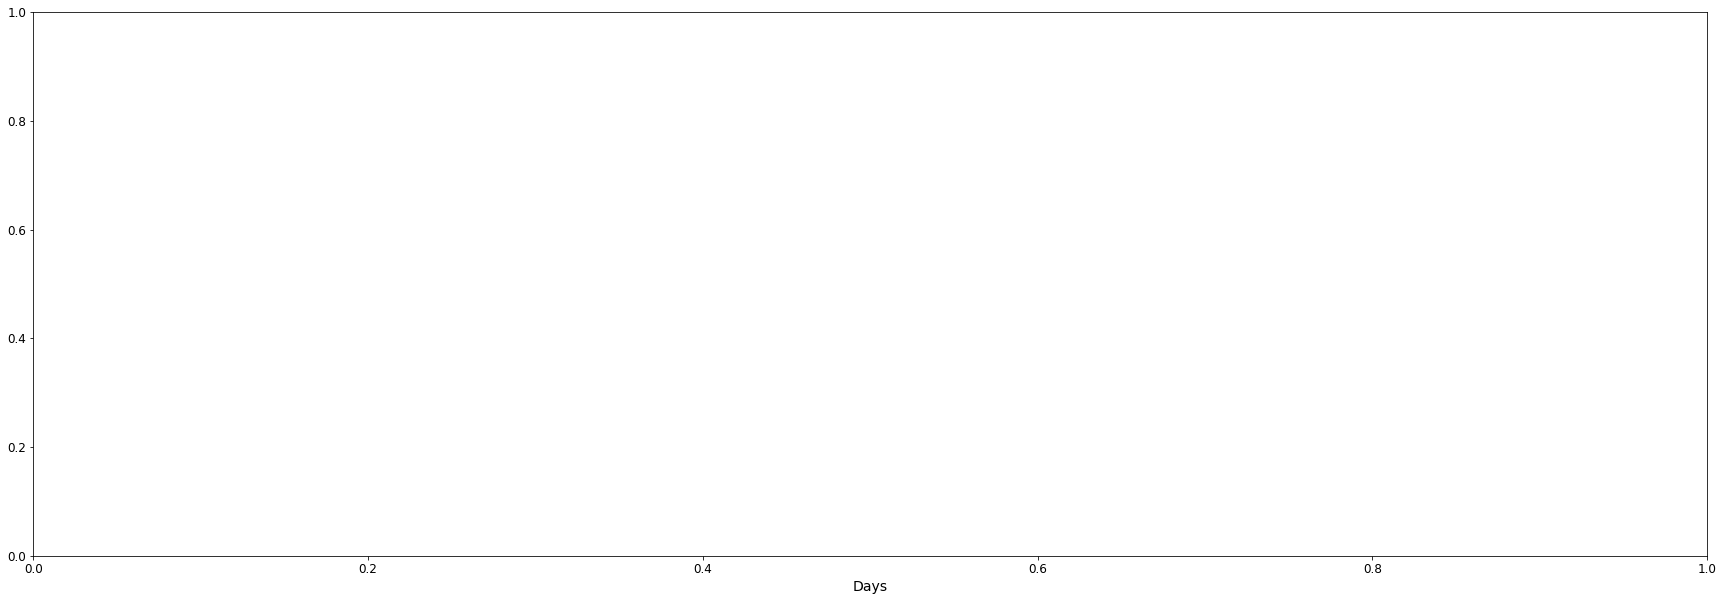

In [86]:
figure = results.plot_forecast(10)
plt.tight_layout()



AttributeError: 'Figure' object has no attribute 'plot'